In [57]:
# Newton method with complex numbers

In [58]:
import numpy as np, matplotlib.pylab as plt

# Initial conditions
n = 1000
xmin = complex(-6, -6)
xmax = complex(6, 6)
tolerance = 1e-8
stepCount = 1
xreal = np.zeros(n*n)
ximag = np.zeros(n*n)
stepCountList = np.zeros(n*n)
rootFound = np.zeros(n*n)

# Desired function
def f(z):
    return (z**2 - (1 + 3j)**2) * (z**2 - (5 + 1j)**2) * (z**2 - (3 - 2j)**2)

# Derivative of desired function
def df(z):
    return 6*(z**5) - (84 + 16j) * (z**3) + (40 - 96j) * z

# Determines whether x is within tolerance
# of the actual root.
def isInTolerance(xreal, ximag, tolerance):
    x = complex(xreal, ximag)
    return np.sqrt((f(x).real**2) + (f(x).imag**2)) <= tolerance

# Finds the next x value based on the current
def nextx (xreal, ximag):
    x = complex(xreal, ximag)
    #print(x)
    if df(x) != 0:
        return x - (f(x)/df(x))
    else:
        return x - (f(x)/((df(x))+tolerance)) # avoid division by zero

In [59]:
# Create lines along imaginary and real axes
# These are the dimensions of the rectangular region to examine
dxreal = np.linspace(xmin.real, xmax.real, n)
dximag = np.linspace(xmin.imag, xmax.imag, n)

# Create evenly spaced points across surface of rectangular region to test
for i in range (0, n):
    for j in range (0, n):
        xreal[n*i + j] = dxreal[i]
        ximag[n*i + j] = dximag[j]

In [60]:
# Computational loop
for i in range (0, len(xreal)):
    stepCount = 1

    # Find new complex number until f(x) is within tolerance
    while (not isInTolerance(xreal[i], ximag[i], tolerance)):
        xcomplex = nextx(xreal[i], ximag[i])
        xreal[i] = xcomplex.real
        ximag[i] = xcomplex.imag
        stepCount += 1

    isUnique = True
    stepCountList[i] = stepCount
    rootFound[i] = np.sqrt((xreal[i]**2) + (ximag[i]**2))
    
    # If root has not been found print results
#    if (xreal[i] < xmax.real and xreal[i] > xmin.real) and (ximag[i] < xmax.imag and ximag[i] > xmin.imag):
#        rootFound[i] = np.sqrt((xreal[i]**2) + (ximag[i]**2))
#        
#        for j in range(i): # Compare previously found roots to current root
#            if (abs(xreal[i] - xreal[j]) <= tolerance) and (abs(ximag[i] - ximag[j]) <= tolerance):
#                # Root has been found
#                isUnique = False
#        
#        if isUnique:
#            # Root has not been found
#            print("Root is ", round(xreal[i], 3), " + ", round(ximag[i], 3), "i")
#            print("Found root in ", stepCount, " steps.")
#            print()

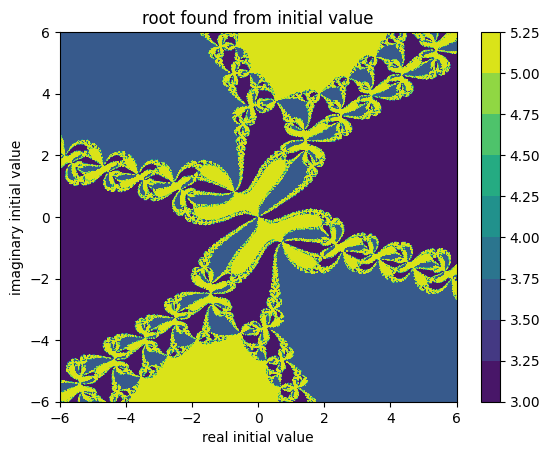

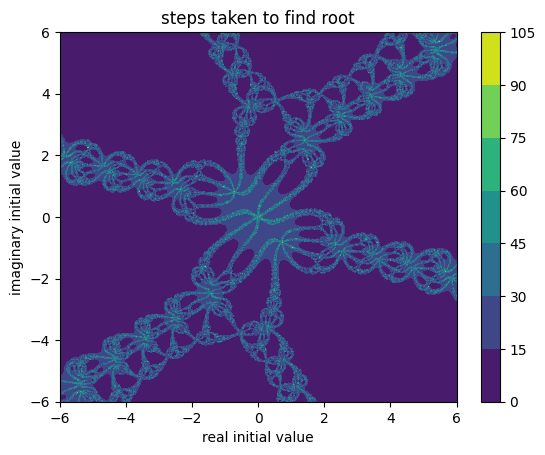

In [61]:
# Plot root vs. initial value
k = 0
rootFound2d = np.zeros([n, n])
for i in range (0, n):
    for j in range (0, n):
        rootFound2d[i, j] = rootFound[k]
        k += 1

plt.contourf(dxreal, dximag, rootFound2d)
plt.colorbar()
plt.xlabel("real initial value")
plt.ylabel("imaginary initial value")
plt.title("root found from initial value")
plt.show()

# Plot step count vs. initial value
contourReal = np.zeros(n)
contourImag = np.zeros(n)

k = 0
stepCountList2d = np.zeros([n, n])
for i in range (0, n):
    for j in range (0, n):
        stepCountList2d[i, j] = stepCountList[k]
        k += 1

plt.contourf(dxreal, dximag, stepCountList2d)
plt.colorbar()
plt.xlabel("real initial value")
plt.ylabel("imaginary initial value")
plt.title("steps taken to find root")
plt.show()